In [1]:
import keras
import numpy as np

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

2024-10-28 14:53:48.127997: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-28 14:53:48.246320: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-28 14:53:48.348510: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-28 14:53:48.372254: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-28 14:53:48.454734: I tensorflow/core/platform/cpu_feature_guar

# Import Data

In [2]:
def import_data(path):
    x_train = np.load(path + "/x_train.npy")
    x_val = np.load(path + "/x_val.npy")
    x_test = np.load(path + "/x_test.npy")
    y_train = np.load(path + "/y_train.npy")
    y_val = np.load(path + "/y_val.npy")
    y_test = np.load(path + "/y_test.npy")
    z_train = np.load(path + "/z_train.npy")
    z_val = np.load(path + "/z_val.npy")
    z_test = np.load(path + "/z_test.npy")

    return x_train, x_val, x_test, y_train, y_val, y_test, z_train, z_val, z_test

In [3]:
def encode(x):
    x[x=="normal"] = 0
    x[x=="benign"] = 1
    x[x=="malignant"] = 2
    x = x.astype(int)

    return x

In [4]:
def onehot_encode(x):
    x = encode(x)
    x_onehot = np.zeros((x.size, x.max()+1))
    x_onehot[np.arange(x.size),x] = 1

    return x_onehot

In [5]:
# import dataset
x_train, x_val, x_test, y_train, y_val, y_test, z_train, z_val, z_test = import_data("data128")

In [6]:
z_val = encode(z_val)
z_test = encode(z_test)

# Import Model

In [7]:
UNet_model = keras.models.load_model("models/UNet_model.h5")
CNN_model = keras.models.load_model("models/CNN_model.h5")

I0000 00:00:1730102039.311094   35632 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730102039.664535   35632 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730102039.664580   35632 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730102039.676274   35632 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730102039.676323   35632 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

# Evaluation

## Validation

In [8]:
pred_val_f = UNet_model.predict(x_val)
pred_val = CNN_model.predict([x_val, pred_val_f])

I0000 00:00:1730102044.474907  103862 service.cc:146] XLA service 0x7f8ed400cfb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730102044.474943  103862 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-10-28 14:54:04.485067: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-28 14:54:04.578344: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


1/3 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step

I0000 00:00:1730102049.298804  103862 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 36s 8s/step


In [9]:
accuracy_val = metrics.accuracy_score(z_val, np.argmax(pred_val, axis=1))

In [10]:
print('Validation Accuracy:', accuracy_val)

Validation Accuracy: 0.7692307692307693


In [12]:
conf_mat_val = confusion_matrix(z_val, np.argmax(pred_val, axis=1))
conf_mat_val

array([[ 9,  4,  0],
       [ 5, 39,  0],
       [ 2,  7, 12]])

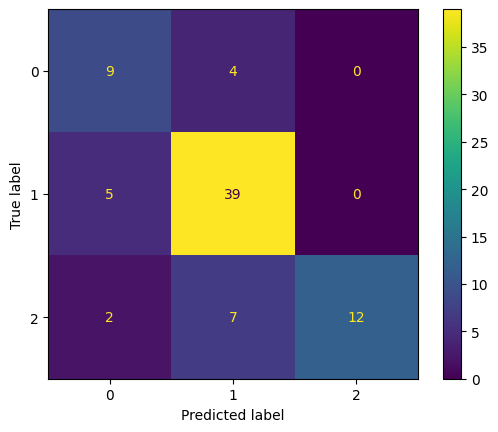

In [13]:
ConfusionMatrixDisplay.from_predictions(z_val, np.argmax(pred_val, axis=1))

## Test

In [14]:
pred_test_f = UNet_model.predict(x_test)
pred_test = CNN_model.predict([x_test, pred_test_f])
accuracy_test = metrics.accuracy_score(z_test, np.argmax(pred_test, axis=1))

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step  
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 7s/step


In [15]:
print('Test Accuracy:', accuracy_test)

Test Accuracy: 0.8354430379746836


In [16]:
conf_mat_test = confusion_matrix(z_test, np.argmax(pred_test, axis=1))
conf_mat_test

array([[12,  2,  0],
       [ 2, 38,  4],
       [ 1,  4, 16]])

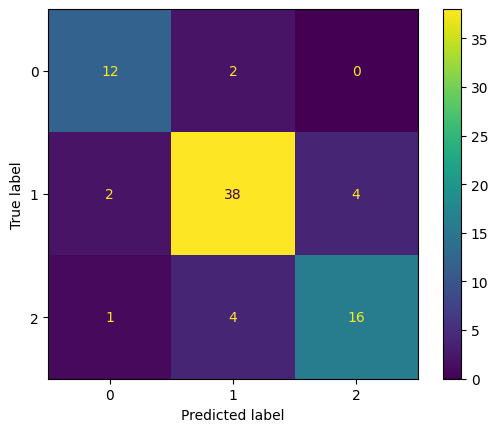

In [17]:
ConfusionMatrixDisplay.from_predictions(z_test, np.argmax(pred_test, axis=1))

In [18]:
matrix = metrics.confusion_matrix(z_test, np.argmax(pred_test, axis=1))

print("Test report")
print(classification_report(z_test, np.argmax(pred_test, axis=1), digits=6))
print("Test accuracy:", matrix.diagonal()/matrix.sum(axis=1))

Test report
              precision    recall  f1-score   support

           0   0.800000  0.857143  0.827586        14
           1   0.863636  0.863636  0.863636        44
           2   0.800000  0.761905  0.780488        21

    accuracy                       0.835443        79
   macro avg   0.821212  0.827561  0.823903        79
weighted avg   0.835443  0.835443  0.835145        79

Test accuracy: [0.85714286 0.86363636 0.76190476]
